In [97]:
# if you need to initialize the OpenAPI Key
import os
import getpass

os.environ['OPENAI_API_KEY'] = getpass.getpass('OpenAI API Key:')

In [98]:
from langchain.document_loaders import PyPDFLoader
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.document_loaders import PyPDFDirectoryLoader


In [116]:
import langchain


def combine_documents(documents):
    combined_documents = []

    building_document_content = ""
    current_source = documents[0].metadata.get('source')  # Initialize from the first document
    for document in documents:
        if document.metadata.get('source') == current_source:
            building_document_content += document.page_content
        else:
            combined_documents.append(langchain.schema.document.Document(metadata={"source": current_source}, page_content=building_document_content))
            building_document_content = document.page_content
            current_source = document.metadata.get('source')

    # Append the last document
    combined_documents.append(langchain.schema.document.Document(metadata={"source": current_source}, page_content=building_document_content))

    return combined_documents


In [117]:
# load the PDFs in the data folder [recipes]
from langchain.document_loaders import PyPDFDirectoryLoader

loader = PyPDFDirectoryLoader("../app/backend/data/")
documents = loader.load()

#combined documents by page

combined_documents = combine_documents(documents)



In [119]:
print(combined_documents[1])

{'source': '../app/backend/data/Stuffed Peppers Recipe - NYT Cooking.pdf', 'content': 'Stuffed Peppers\nBy Lidey Heuck\nAndrew Purcell for The New York Times. Food Stylist: Carrie Purcell.Time1¼ hours\nRating (4391)\nI N G R E D I E N T S\nYield:6 to 8 servings\n4 large red, orange or yellow bell\npeppers\n2 tablespoons olive oil\n1 cup finely chopped fennel bulb\n(about ½ a small bulb) or celery\n1 cup finely chopped yellow onion\n(about 1 small)\n3 garlic cloves, minced\n1 teaspoon dried oregano\n½ teaspoon red-pepper flakes\n1 pound ground beef (at least 15\npercent fat), turkey, chicken or pork\n¾ cup dry white wine, chicken\nbroth or vegetable broth\n1 (14-ounce) can diced fire-\nroasted tomatoes\n1½ teaspoons kosher salt, plus\nmore to taste\n½ teaspoon black pepper, plus\nmore to tasteP R E P A R A T I O N\nStep 1\nHeat the oven to 400 degrees. Cut the peppers in half lengthwise\nand carefully remove core, seeds and ribs using a paring knife.\nArrange the peppers, cut-sides up, 

In [99]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("../app/backend/data/BLT Pasta Recipe - NYT Cooking.pdf")
pages = loader.load_and_split()

In [106]:
pages[0]

Document(page_content='BLT Pasta\nBy Colu Henry\nLinda Xiao for The New York Times. Food Stylist: Ali Slagle.Time30 minutes\nRating (1943)\nI N G R E D I E N T S\nYield:4 to 6 servings\n1 pound paccheri pasta or other\ntubelike shape, such as penne or\nrigatoni\n8 ounces bacon, diced into ½-inch\npieces\n1 pound cherry tomatoes, halved\nKosher salt (such as Diamond\nCrystal) and black pepper\n5 ounces baby arugula\n½ cup grated Pecorino Romano,\nplus more for serving\nFlaky salt, for serving (optional)P R E P A R A T I O N\nStep 1\nBring a large pot of well-salted water (2 heaping tablespoons\nkosher salt to about 7 quarts water) to a boil. Add pasta and cook\nuntil it is just under al dente, 1 minute less than package\ndirections. Reserve 1 cup of the pasta cooking water, and drain the\npasta.\nStep 2\nMeanwhile, make the sauce: Place the bacon in a large skillet and\ncook over medium-low heat until crisp, stirring occasionally to\nmake sure it does not burn, about 8 minutes. Remove w

In [107]:

for page in pages:
    pages[0].page_content = pages[0].page_content + page.page_content

recipe = pages[0]

print(recipe)

page_content="BLT Pasta\nBy Colu Henry\nLinda Xiao for The New York Times. Food Stylist: Ali Slagle.Time30 minutes\nRating (1943)\nI N G R E D I E N T S\nYield:4 to 6 servings\n1 pound paccheri pasta or other\ntubelike shape, such as penne or\nrigatoni\n8 ounces bacon, diced into ½-inch\npieces\n1 pound cherry tomatoes, halved\nKosher salt (such as Diamond\nCrystal) and black pepper\n5 ounces baby arugula\n½ cup grated Pecorino Romano,\nplus more for serving\nFlaky salt, for serving (optional)P R E P A R A T I O N\nStep 1\nBring a large pot of well-salted water (2 heaping tablespoons\nkosher salt to about 7 quarts water) to a boil. Add pasta and cook\nuntil it is just under al dente, 1 minute less than package\ndirections. Reserve 1 cup of the pasta cooking water, and drain the\npasta.\nStep 2\nMeanwhile, make the sauce: Place the bacon in a large skillet and\ncook over medium-low heat until crisp, stirring occasionally to\nmake sure it does not burn, about 8 minutes. Remove with a\nsl

In [78]:
documents = loader.load()

In [79]:
print(documents[1])

page_content='2 tablespoons finely grated fresh\npineapple, including accumulated\njuices\n1½ pounds boneless, skinless\nchicken breasts, cut into 1½-inch\nchunks\nCooked white rice, for servingStep 4\nServe the chicken over rice and top with the reserved pineapple\nsalsa.\nPrivate Notes\nLeave a Private Note on this recipe and see it here.' metadata={'source': '../app/backend/data/Pineapple-Marinated Chicken Breasts Recipe - NYT Cooking.pdf', 'page': 1}


In [8]:

documents = loader.load()



embeddings = OpenAIEmbeddings()



db = FAISS.from_documents(documents, embeddings)
db.save_local("../app/backend/faiss_index")

IndexError: list index out of range

In [80]:
# if you need to load db
embeddings = OpenAIEmbeddings()
db = FAISS.load_local("../app/backend/faiss_index", embeddings)

In [81]:
retriever = db.as_retriever(search_type="similarity_score_threshold", search_kwargs={"k": 1, "score_threshold": .7})

In [82]:
docs = retriever.get_relevant_documents('Beef Recipes')
if docs is None:
    print('No documents found')
else:
    #print type info of document
    print(docs[0])

page_content='Chili\nBy Ali Slagle\nLinda Xiao for The New York Times. Food Stylist; Hadas Smirnoff. Prop\nStylist: Megan Hedgepeth.Time1½ hours\nRating (473)\nI N G R E D I E N T S\nYield:6 to 8 servings\n2 tablespoons neutral oil, such as\ngrapeseed\n2 pounds ground beef, preferably\n20 percent fat\nSalt and pepper\n1 large yellow onion, coarsely\nchopped\n4 garlic cloves, finely chopped or\ngrated\n1 tablespoon ground cumin\n1 tablespoon store-bought or\nhomemade chili powder, plus more\nif needed\n1 chipotle pepper in adobo plus 1\nteaspoon sauce (or 1 additional\ntablespoon chili powder)\n1 (15-ounce) can tomato sauceP R E P A R A T I O N\nStep 1\nHeat the oil in a large pot or Dutch oven over medium-high.\nWorking in batches if necessary to avoid crowding the pot, use\nyour hands to break the beef into small chunks (about 2 inches\neach) and add a single layer to the pot. Season with salt and\npepper, then cook, flipping once, until browned on two sides, 4 to 6\nminutes. (Meat wo

In [83]:
from langchain.llms import OpenAI
llm = OpenAI()

In [84]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613")

In [85]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

In [86]:
llm = OpenAI(temperature=.7)
template = """You are a recipe search bot. Given a prompt from the end user you will generate search terms relevant to the question to help responding to the prompt.
Make sure that if the user says they don't want something that you will not generate a search term for that item, as the keyword semantic search may still return results for that item.

prompt from user: {user_prompt}
Recipe Search Terms: """

prompt_template = PromptTemplate(input_variables=["user_prompt"], template=template)
recipe_terms_chain = LLMChain(llm=llm, prompt=prompt_template)

In [73]:
templateRecipeReader = """You are a recipe recommender bot. You will be given context about a recipe. You will be knowledgable about the recipe and explain it highlighting key details like ingredients, time duration, difficulty and an over synopsis.

recipe data: {recipe_data}

Recipe Explanation Format should look like
Title: [Recipe Title], By [Author Name]
Duration: [Recipe Duration]
Ingredients: [Recipe Ingredients] 
Synopsis: [Recipe Synopsis]

Recipe Explanation based on recipe data:
"""
prompt_template_recipe_reader = PromptTemplate(input_variables=["recipe_data"], template=templateRecipeReader)
recipe_reader_chain = LLMChain(llm=llm, prompt=prompt_template_recipe_reader)

In [87]:
recipe_reader_chain.run(recipe_data=docs[0].page_content, user_prompt='I want a beef recipe')

"Title: Chili, By Ali Slagle\nDuration: 1½ hours\nIngredients: 2 tablespoons neutral oil, such as grapeseed; 2 pounds ground beef, preferably 20 percent fat; Salt and pepper; 1 large yellow onion, coarsely chopped; 4 garlic cloves, finely chopped or grated; 1 tablespoon ground cumin; 1 tablespoon store-bought or homemade chili powder, plus more if needed; 1 chipotle pepper in adobo plus 1 teaspoon sauce (or 1 additional tablespoon chili powder); 1 (15-ounce) can tomato sauce\nSynopsis: This is a spicy, smoky and hearty pot of chili. It's the kind of chili you need after a long day skiing — or hibernating. To create a rich and thick sauce, simmer aromatics, chili powder and cocoa powder with a small quantity of tomato sauce and a big quantity of ground beef. Use meat with ample fat (at least 20 percent), because it deepens the flavor of those aromatics. If you like the meat in your chili to be so soft it nearly crumbles, simmer your batch longer; if you prefer your chili without beans, 

In [96]:
json_template = """You will generate valid json using the following format based on recipe data you are given. Only generate the json_data as I am using this output to parse another function.

    they keys for json_data are: title, author, cooktime

    recipe data = {recipe_data}

    recipe json ="""

prompt_template = PromptTemplate(
        input_variables=["recipe_data"], template=json_template)
recipe_json_chain = LLMChain(llm=llm, prompt=prompt_template)

recipe_json_str = recipe_json_chain.run(recipe_data=docs[0].page_content)

print(recipe_json_str)

 {
        "title": "Chili",
        "author": "Ali Slagle, Linda Xiao, Hadas Smirnoff, Megan Hedgepeth",
        "cooktime": "1 ½ hours"
    }


In [16]:
template_recipe_reader_v2 = """ You will be given the data of a single recipe. You will read the recipe and use only the information there to answer the user.
You will also be given a user prompt to answer. You will answer the user prompt based on the recipe data.

recipe data: {recipe_data}
user prompt: {user_prompt}

Recipe Response to user:
"""
prompt_template_recipe_reader_v2 = PromptTemplate(input_variables=["recipe_data", "user_prompt"], template=template_recipe_reader_v2)
recipe_reader_chain_v2 = LLMChain(llm=llm, prompt=prompt_template_recipe_reader_v2)

In [17]:
from IPython.display import Image
from pdf2image import convert_from_path
from IPython.display import display, Image


In [23]:
def searchRecipes(prompt, chat_history):
    # generate search terms
    search_terms_raw = recipe_terms_chain.run(user_prompt=prompt)
    # clean the search terms generated by the LLM
    search_terms = search_terms_raw.split(", ")
    # query vector db using search term

    print(f'I am searching using this search term: {search_terms[0]}')

    docs = retriever.get_relevant_documents(search_terms[0])

    print(docs[0].metadata)

    source_pdf_path = docs[0].metadata.get('source')

    doc = docs[0]

    bot_response = recipe_reader_chain_v2.run(recipe_data=doc.page_content, user_prompt=prompt)

    print(bot_response)
    pdf = open(source_pdf_path, 'rb')
    images = convert_from_path(source_pdf_path)

    for img in images:
        display(img)
        # Display the PDF file
        Image(pdf)

    chat_history.append(f"\n User Prompt:{prompt} \n Bot Response:{bot_response} \n Source Recipe: {source_pdf_path} \n Recipe Content: {doc.page_content}")
    
    return chat_history
    


In [24]:
searchRecipes('I want to make an easy quick asian meal', '')

I am searching using this search term: 
- "easy quick asian meal" 
- "easy asian recipes" 
- "quick asian recipes" 
- "fast asian recipes" 
- "quick and easy asian recipes" 
- "Asian stir fry recipes"
- "Asian noodle recipes" 
- "Asian soup recipes" 
- "Asian rice recipes" 
- "Asian one-pot meals"
{'source': 'data/Easy Kung Pao Chicken Recipe - NYT Cooking.pdf', 'page': 0}
If you're looking for an easy and quick Asian meal, you should try making Easy Kung Pao Chicken. This dish comes from Pearl Han and her daughter Grace Han and only takes 15 minutes to prepare. Plus, it's filled with flavor from the salty tang of the kung pao sauce and the heat of the dried chiles. Serve over steamed rice and some stir-fried vegetables for a complete meal.


FileNotFoundError: [Errno 2] No such file or directory: 'data/Easy Kung Pao Chicken Recipe - NYT Cooking.pdf'

In [138]:

template_with_chat_history = """You are a recipe search bot. Given a prompt from the end user you will generate search terms relevant to the question to help responding to the prompt.
Make sure that if the user says they don't want something that you will not include anything related to that in your terms.

For example, if the user says they don't want to use eggs, you should not include eggs in your search terms.

prompt from user: {user_prompt}
Recipe Search Terms: """

template_with_chat_history_template = PromptTemplate(input_variables=["user_prompt"], template=template_with_chat_history)
recipe_terms_chain = LLMChain(llm=llm, prompt=template_with_chat_history_template)

In [139]:
template_recipe_reader_chat_history = """ You will be given the data of a recipe. You will read the recipe and use only the information there to answer the user.
You will also be given a user prompt to answer. You will answer the user prompt based on the recipe data.

previous chat history: {chat_history}

most relevant recipe data: {recipe_data}
use the most relevant recipe data and the user prompt to answer the user.

user prompt: {user_prompt}

Recipe Response to user:
"""
prompt_template_recipe_reader_chat_history = PromptTemplate(input_variables=["recipe_data", "user_prompt", "chat_history"], template=template_recipe_reader_chat_history)
recipe_reader_chain_chat_history = LLMChain(llm=llm, prompt=prompt_template_recipe_reader_chat_history)

In [153]:
def context_enabled(query, chat_history):
    search_terms_raw = recipe_terms_chain.run(user_prompt=query)
    # clean the search terms generated by the LLM
    search_terms = search_terms_raw.split(", ")
    # query vector db using search term

    print(f'I am searching using this search term: {search_terms[0]}')

    docs = retriever.get_relevant_documents(search_terms[0])

    if len(docs) == 0:
        print("No documents found")
        bot_response = recipe_reader_chain_chat_history(recipe_data="No Recipe Found",user_prompt=query, chat_history=chat_history)
        chat_history += (f"\n User Prompt:{query} \n Bot Response: No documents found")
        return chat_history

    print(docs)

    print(docs[0].metadata)

    source_pdf_path = docs[0].metadata.get('source')

    doc = docs[0]
    print(docs[0].page_content)

    bot_response = recipe_reader_chain_chat_history.run(recipe_data=doc.page_content, user_prompt=query, chat_history=chat_history)

    print(bot_response)
    pdf = open(source_pdf_path, 'rb')
    images = convert_from_path(source_pdf_path)

    for img in images:
        display(img)
        # Display the PDF file
        Image(pdf)

    chat_history += (f"\n User Prompt:{query} \n Bot Response:{bot_response} \n Source Recipe: {source_pdf_path} \n Recipe Content: {doc.page_content}")
    
    return chat_history


In [154]:
chat_history = ""

I am searching using this search term: 

Chicken recipes
[Document(page_content='Chicken\nStroganoff \nBy Ham El-Waylly\nDavid Malosh for The New York Times. Food Stylist: Simon Andrews.Time35 minutes\nRating (1473)\nI N G R E D I E N T S\nYield:4 servings\n4 tablespoons unsalted butter\n1 pound button mushrooms, wiped\nclean and cut into quarters\nKosher salt\n1 large yellow onion, finely diced\n4 garlic cloves, minced\n1 fresh or dried bay leaf\n1 cup heavy cream\n1 pound boneless, skinless chicken\nbreasts, cut into ½-inch pieces\n1 cup tomato purée or passata\n1 tablespoon ketchup\n1 tablespoon Dijon mustard\n2 teaspoons Worcestershire sauce\n⅓ cup parsley leaves, roughly\nchoppedP R E P A R A T I O N\nStep 1\nPlace a medium pot over medium-high heat and add the butter.\nWhen the butter has started foaming, add the mushrooms, toss to\ncoat and season with a large pinch of salt. Cook, stirring\nfrequently, until the mushrooms have released all their liquid and\nare a deep mahogany b

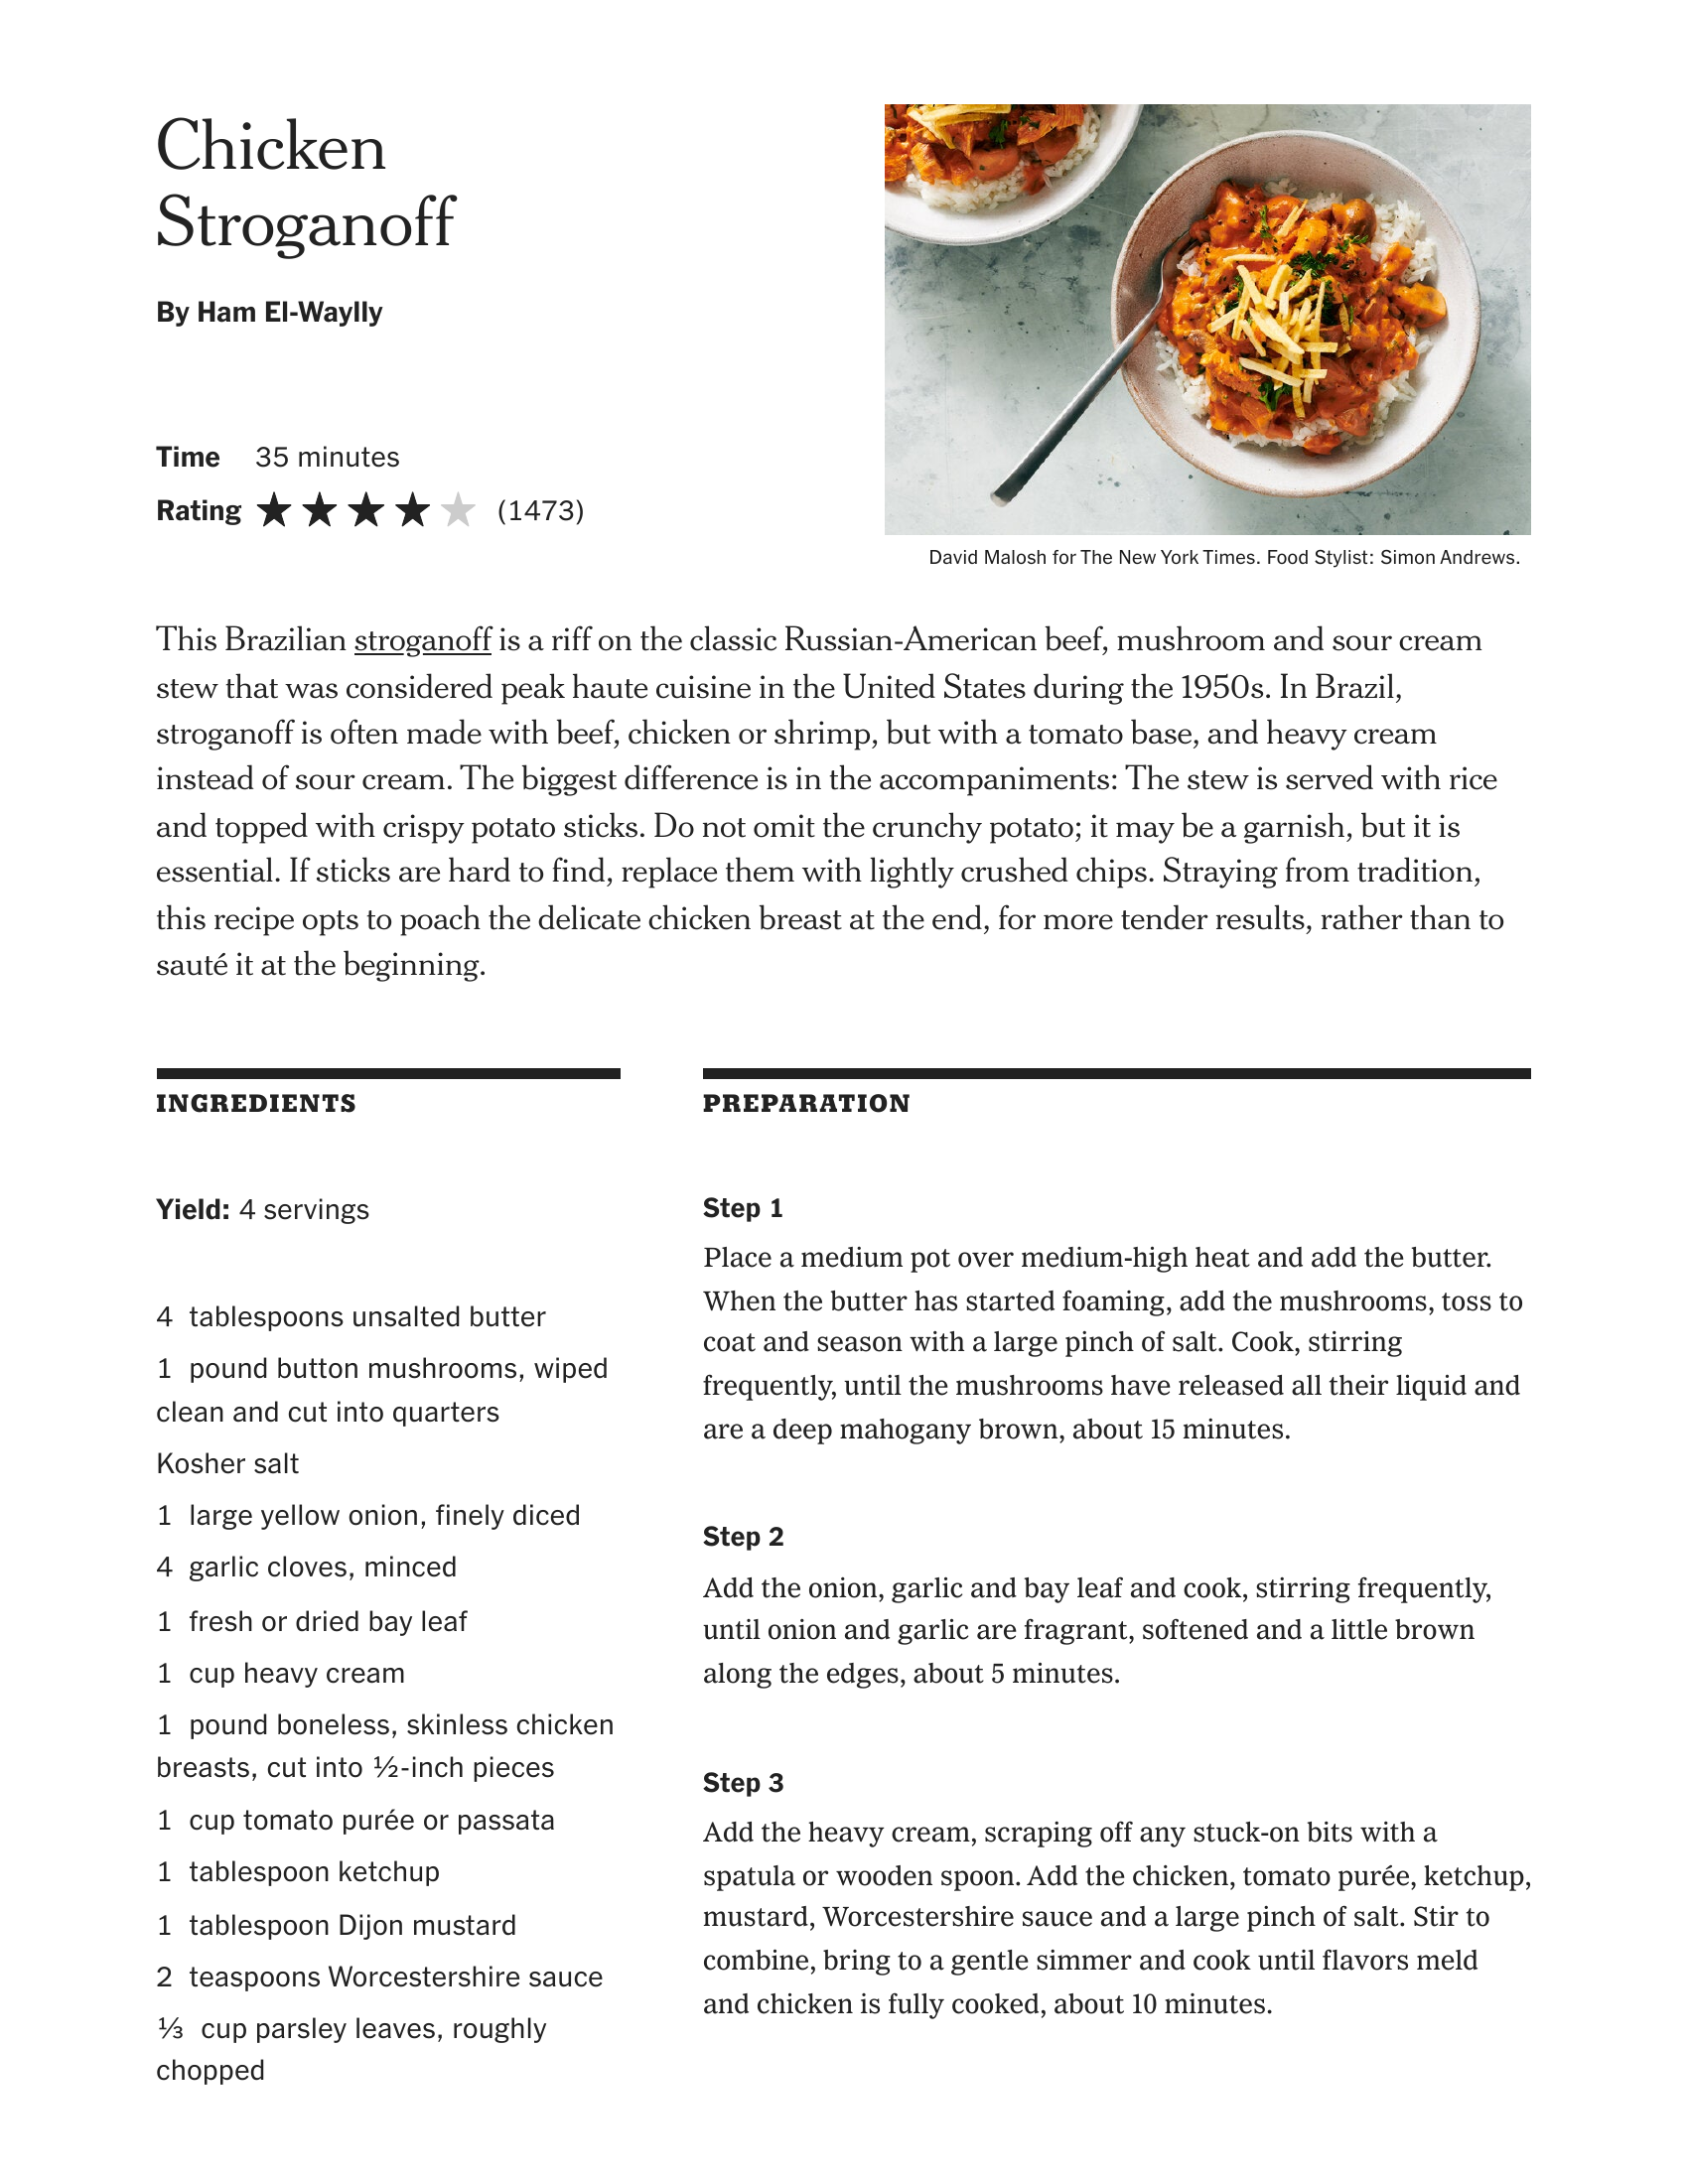

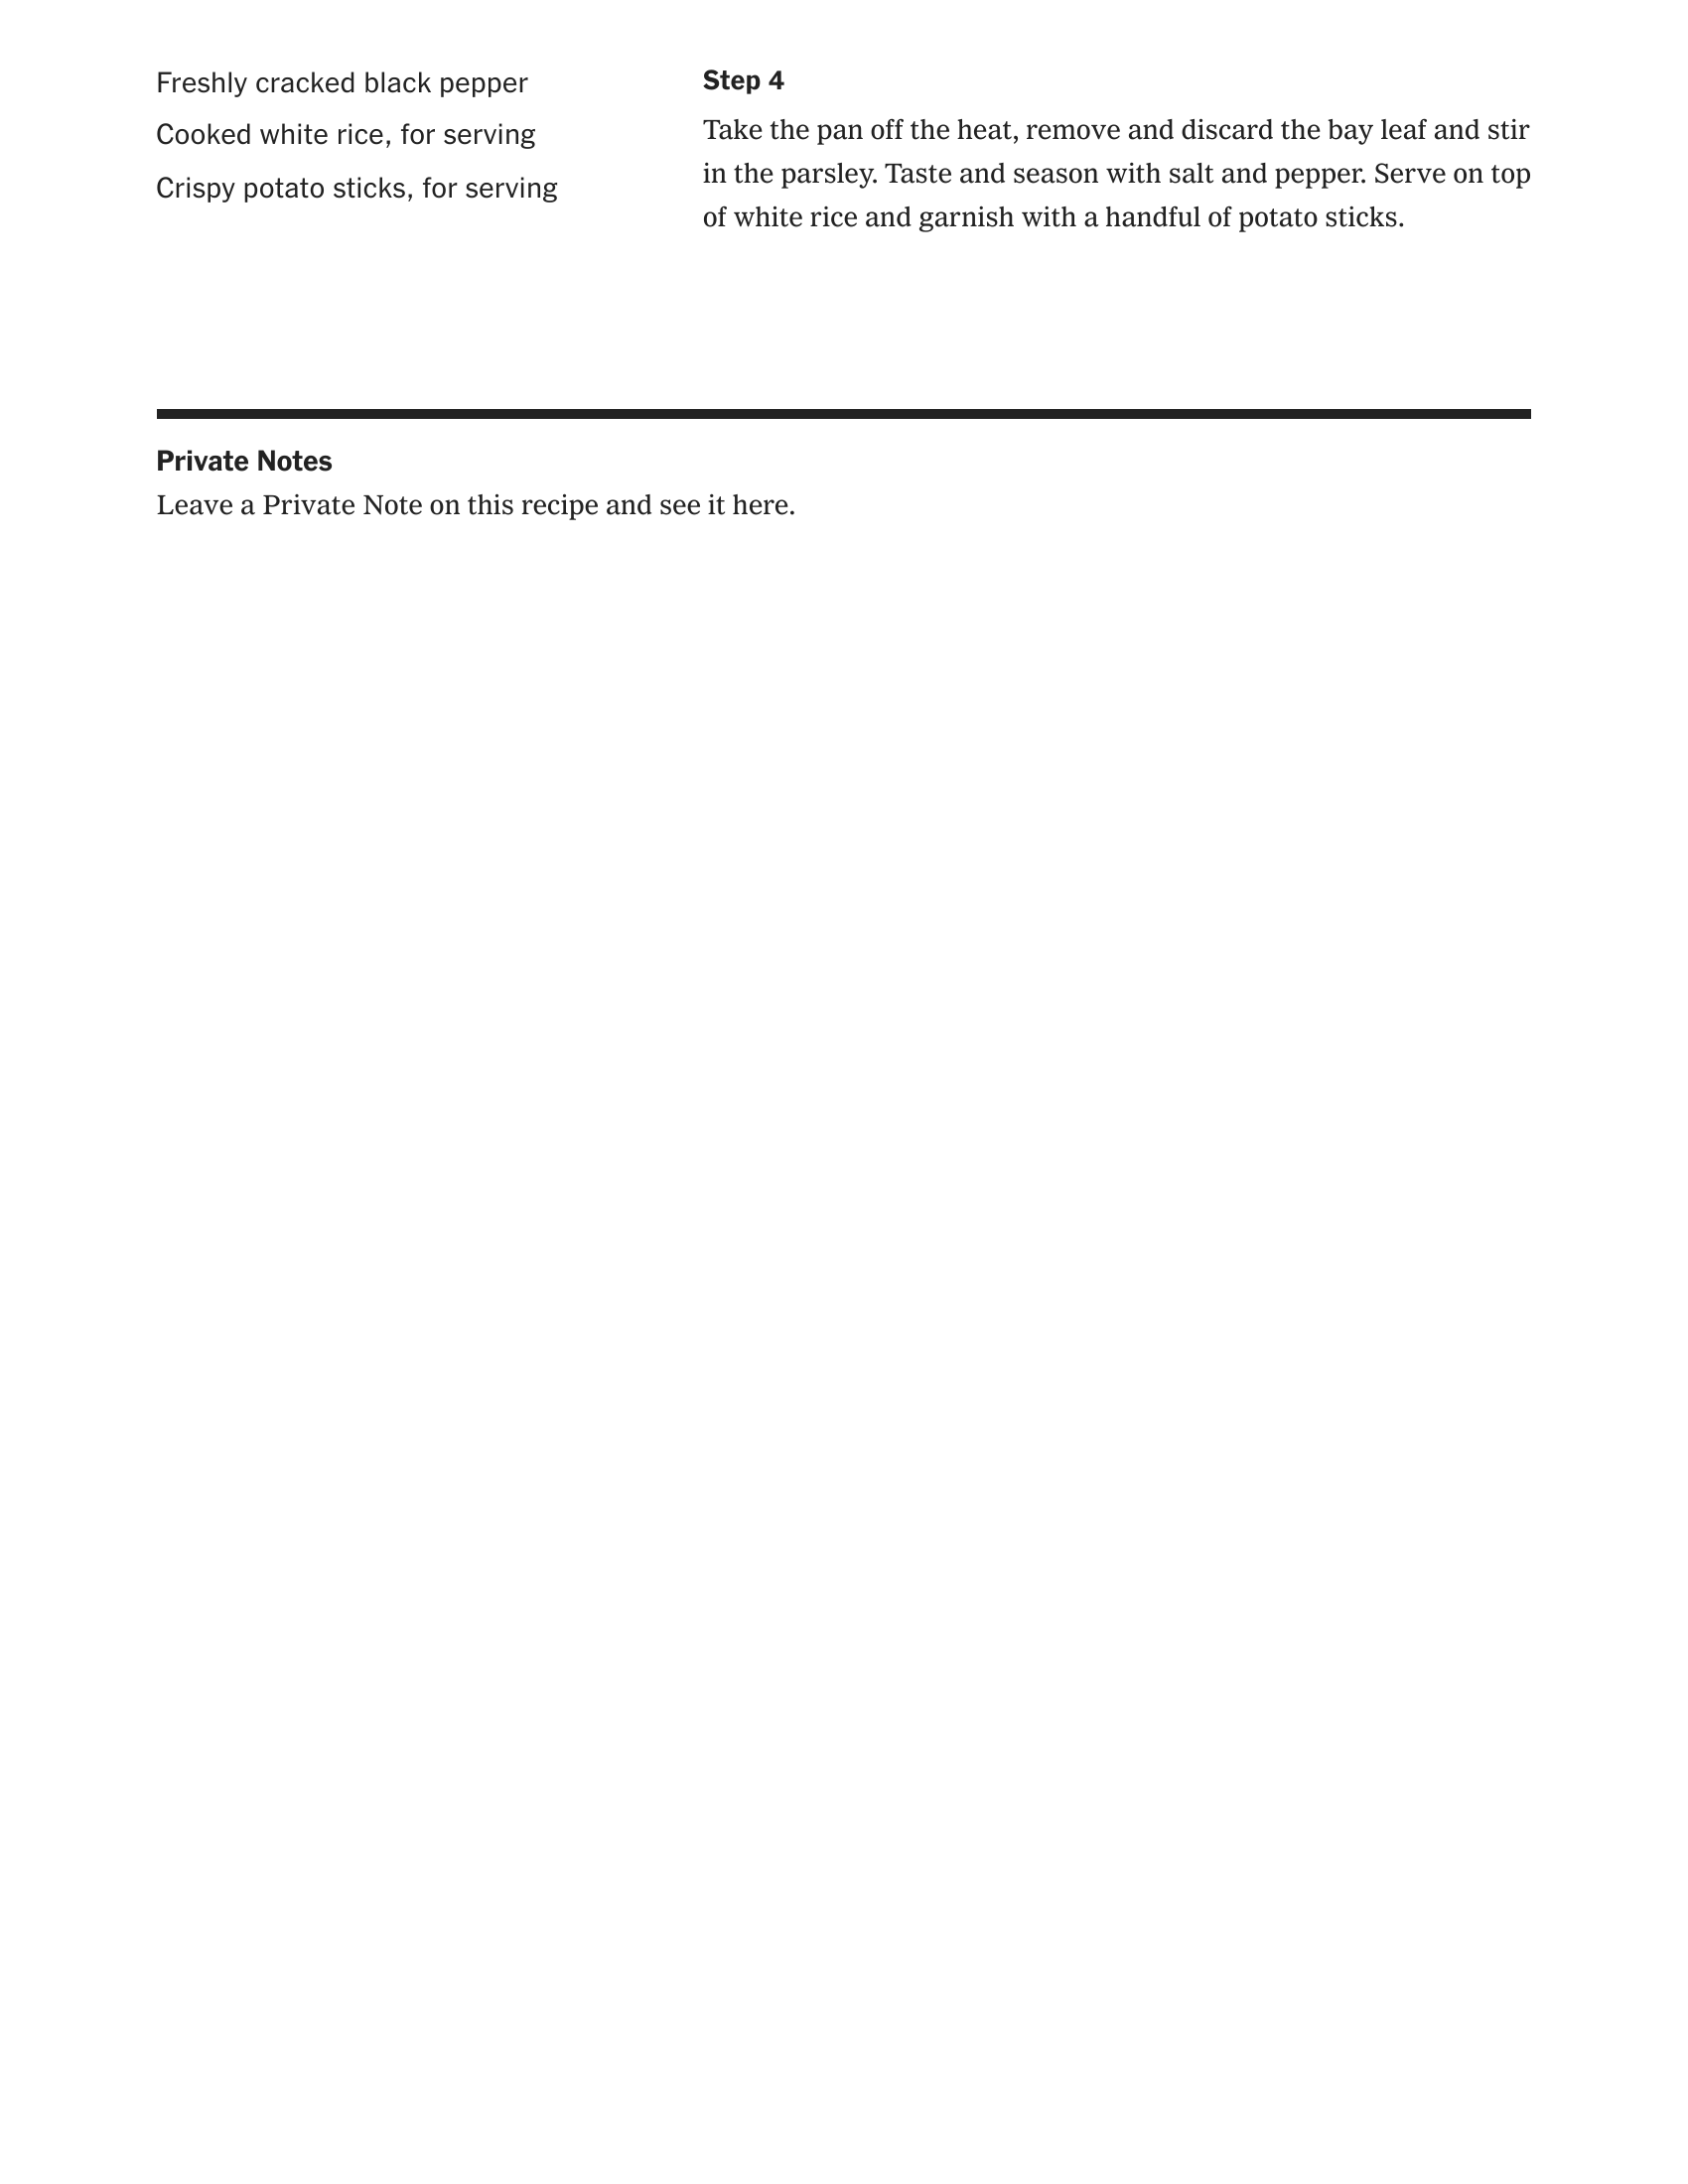

In [155]:
chat_history = context_enabled("I want a chicken recipe", "")

I am searching using this search term: 
No onion recipes
[Document(page_content='Private Notes\nLeave a Private Note on this recipe and see it here.', metadata={'source': 'data/Everyday Pancakes Recipe - NYT Cooking.pdf', 'page': 1})]
{'source': 'data/Everyday Pancakes Recipe - NYT Cooking.pdf', 'page': 1}
Private Notes
Leave a Private Note on this recipe and see it here.
Unfortunately, this recipe does require onion. However, you can always leave out the onion if you prefer.


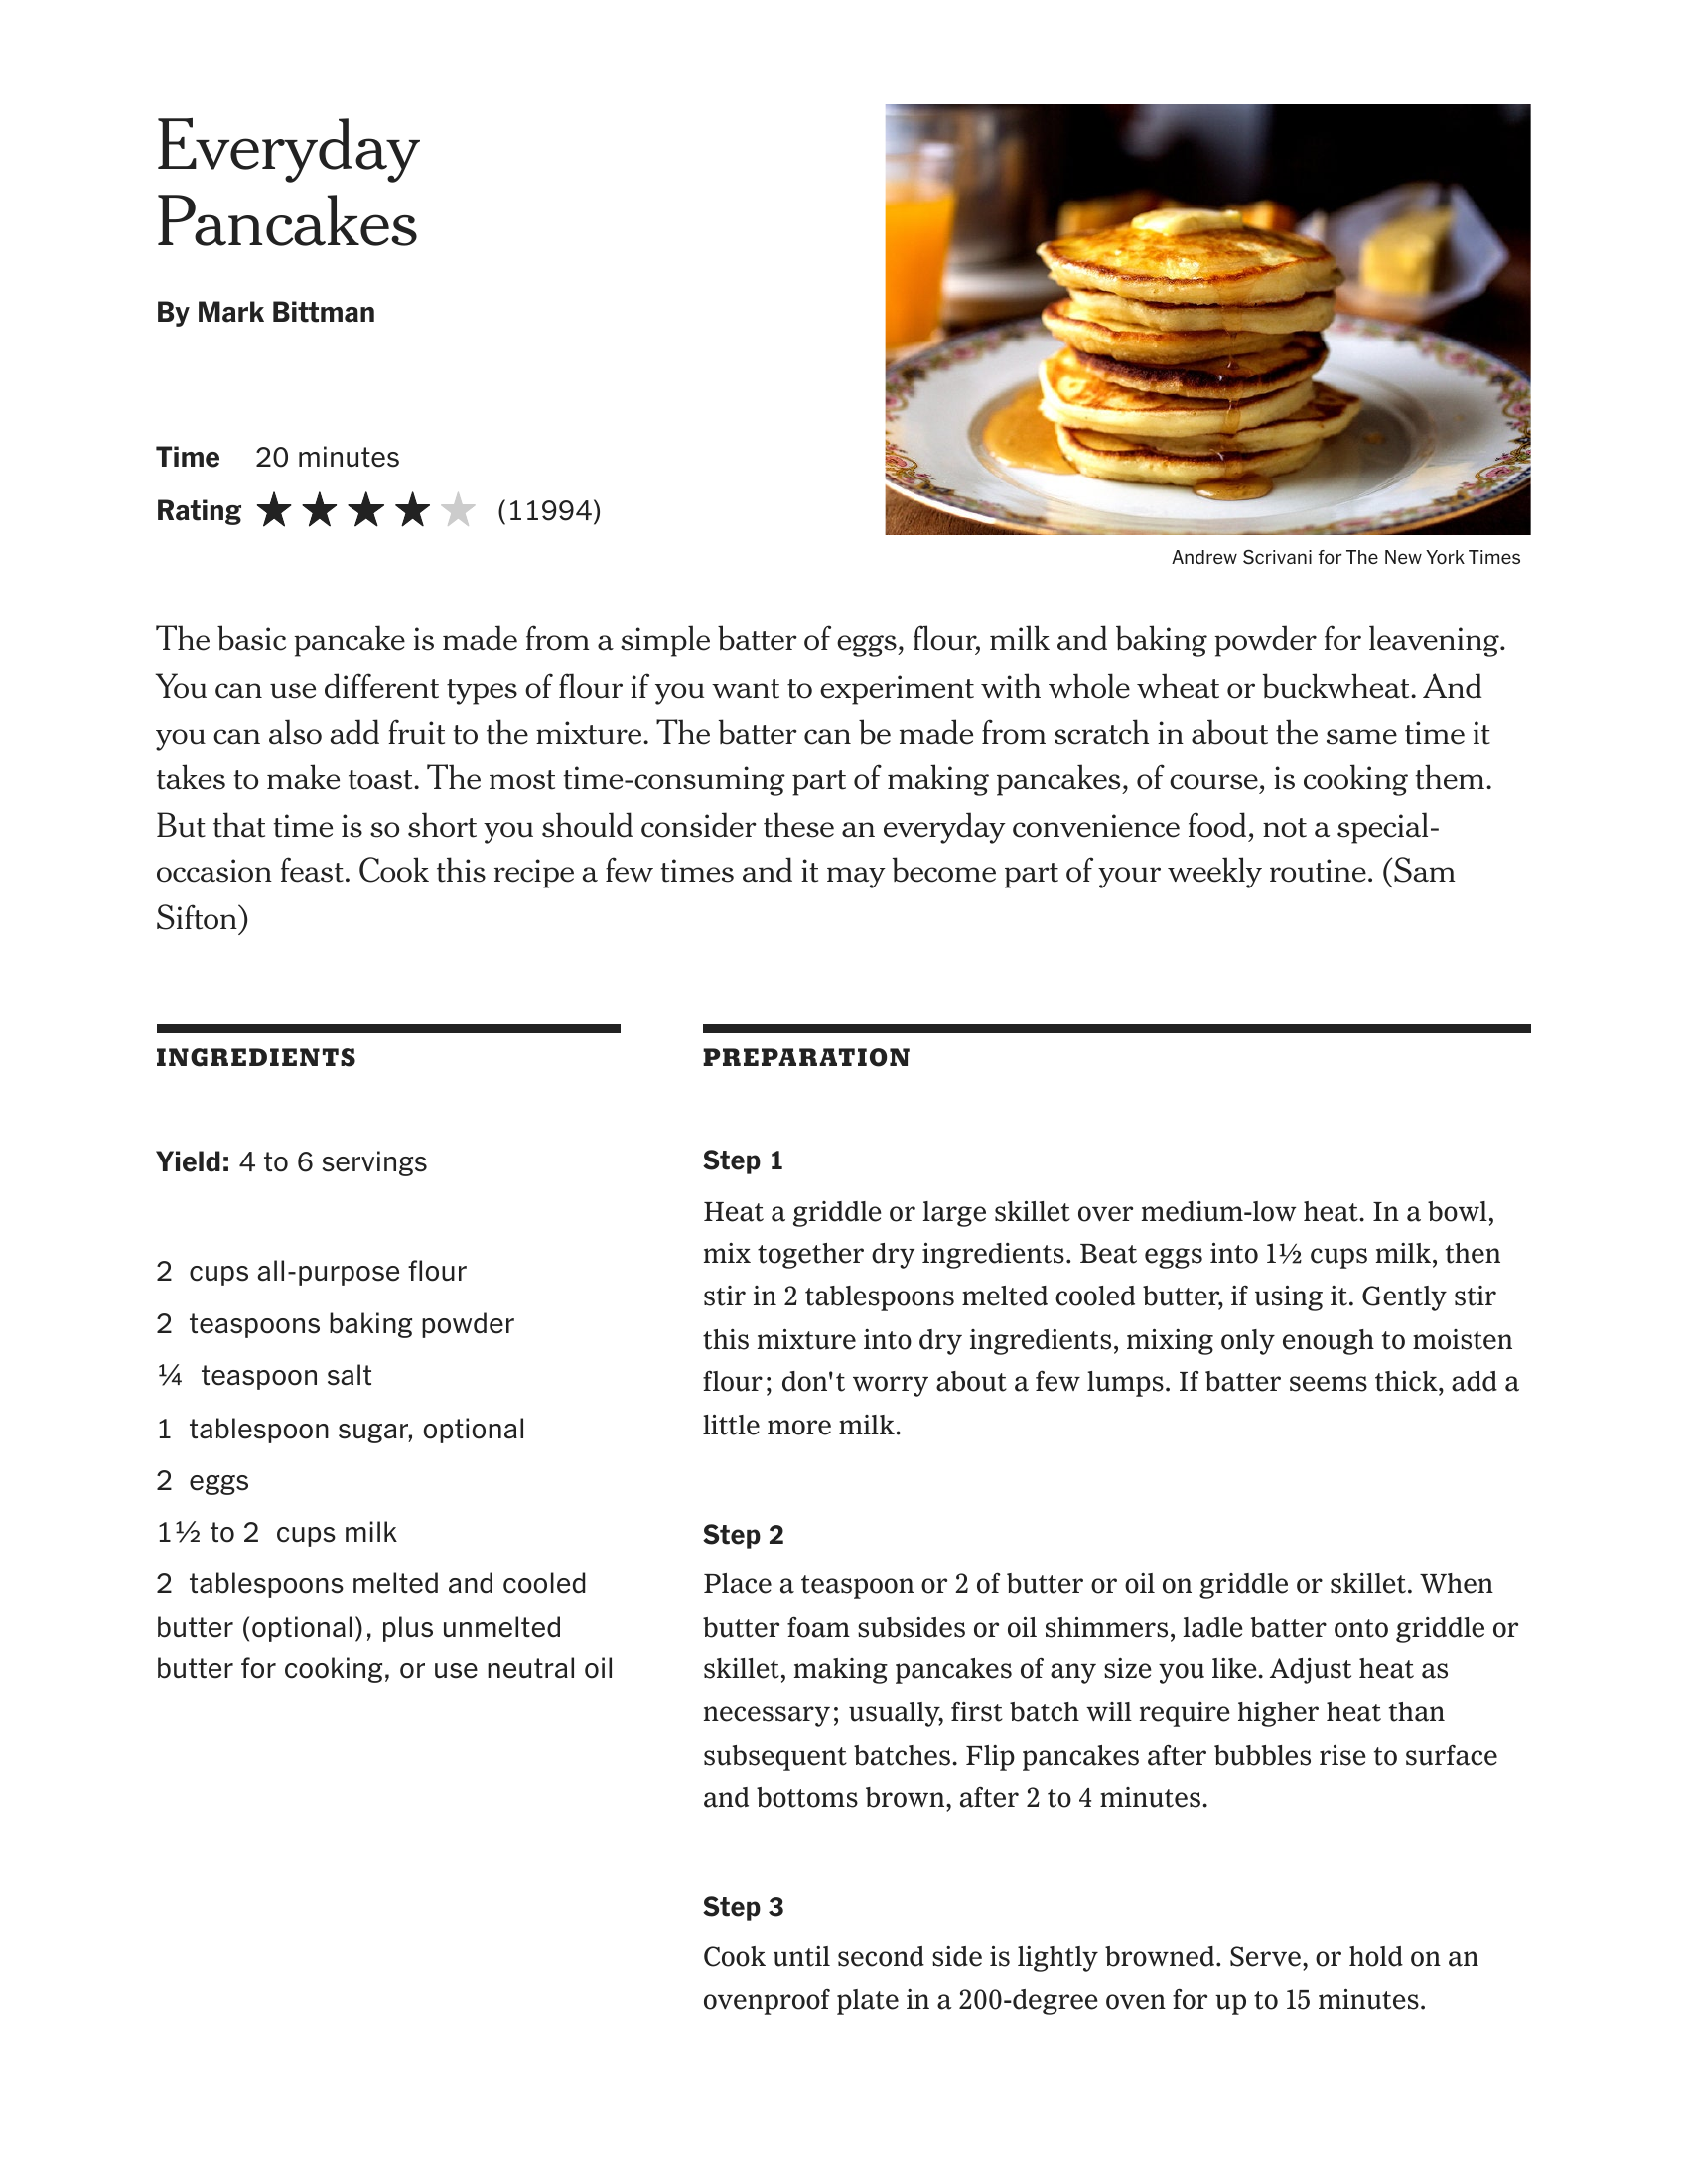

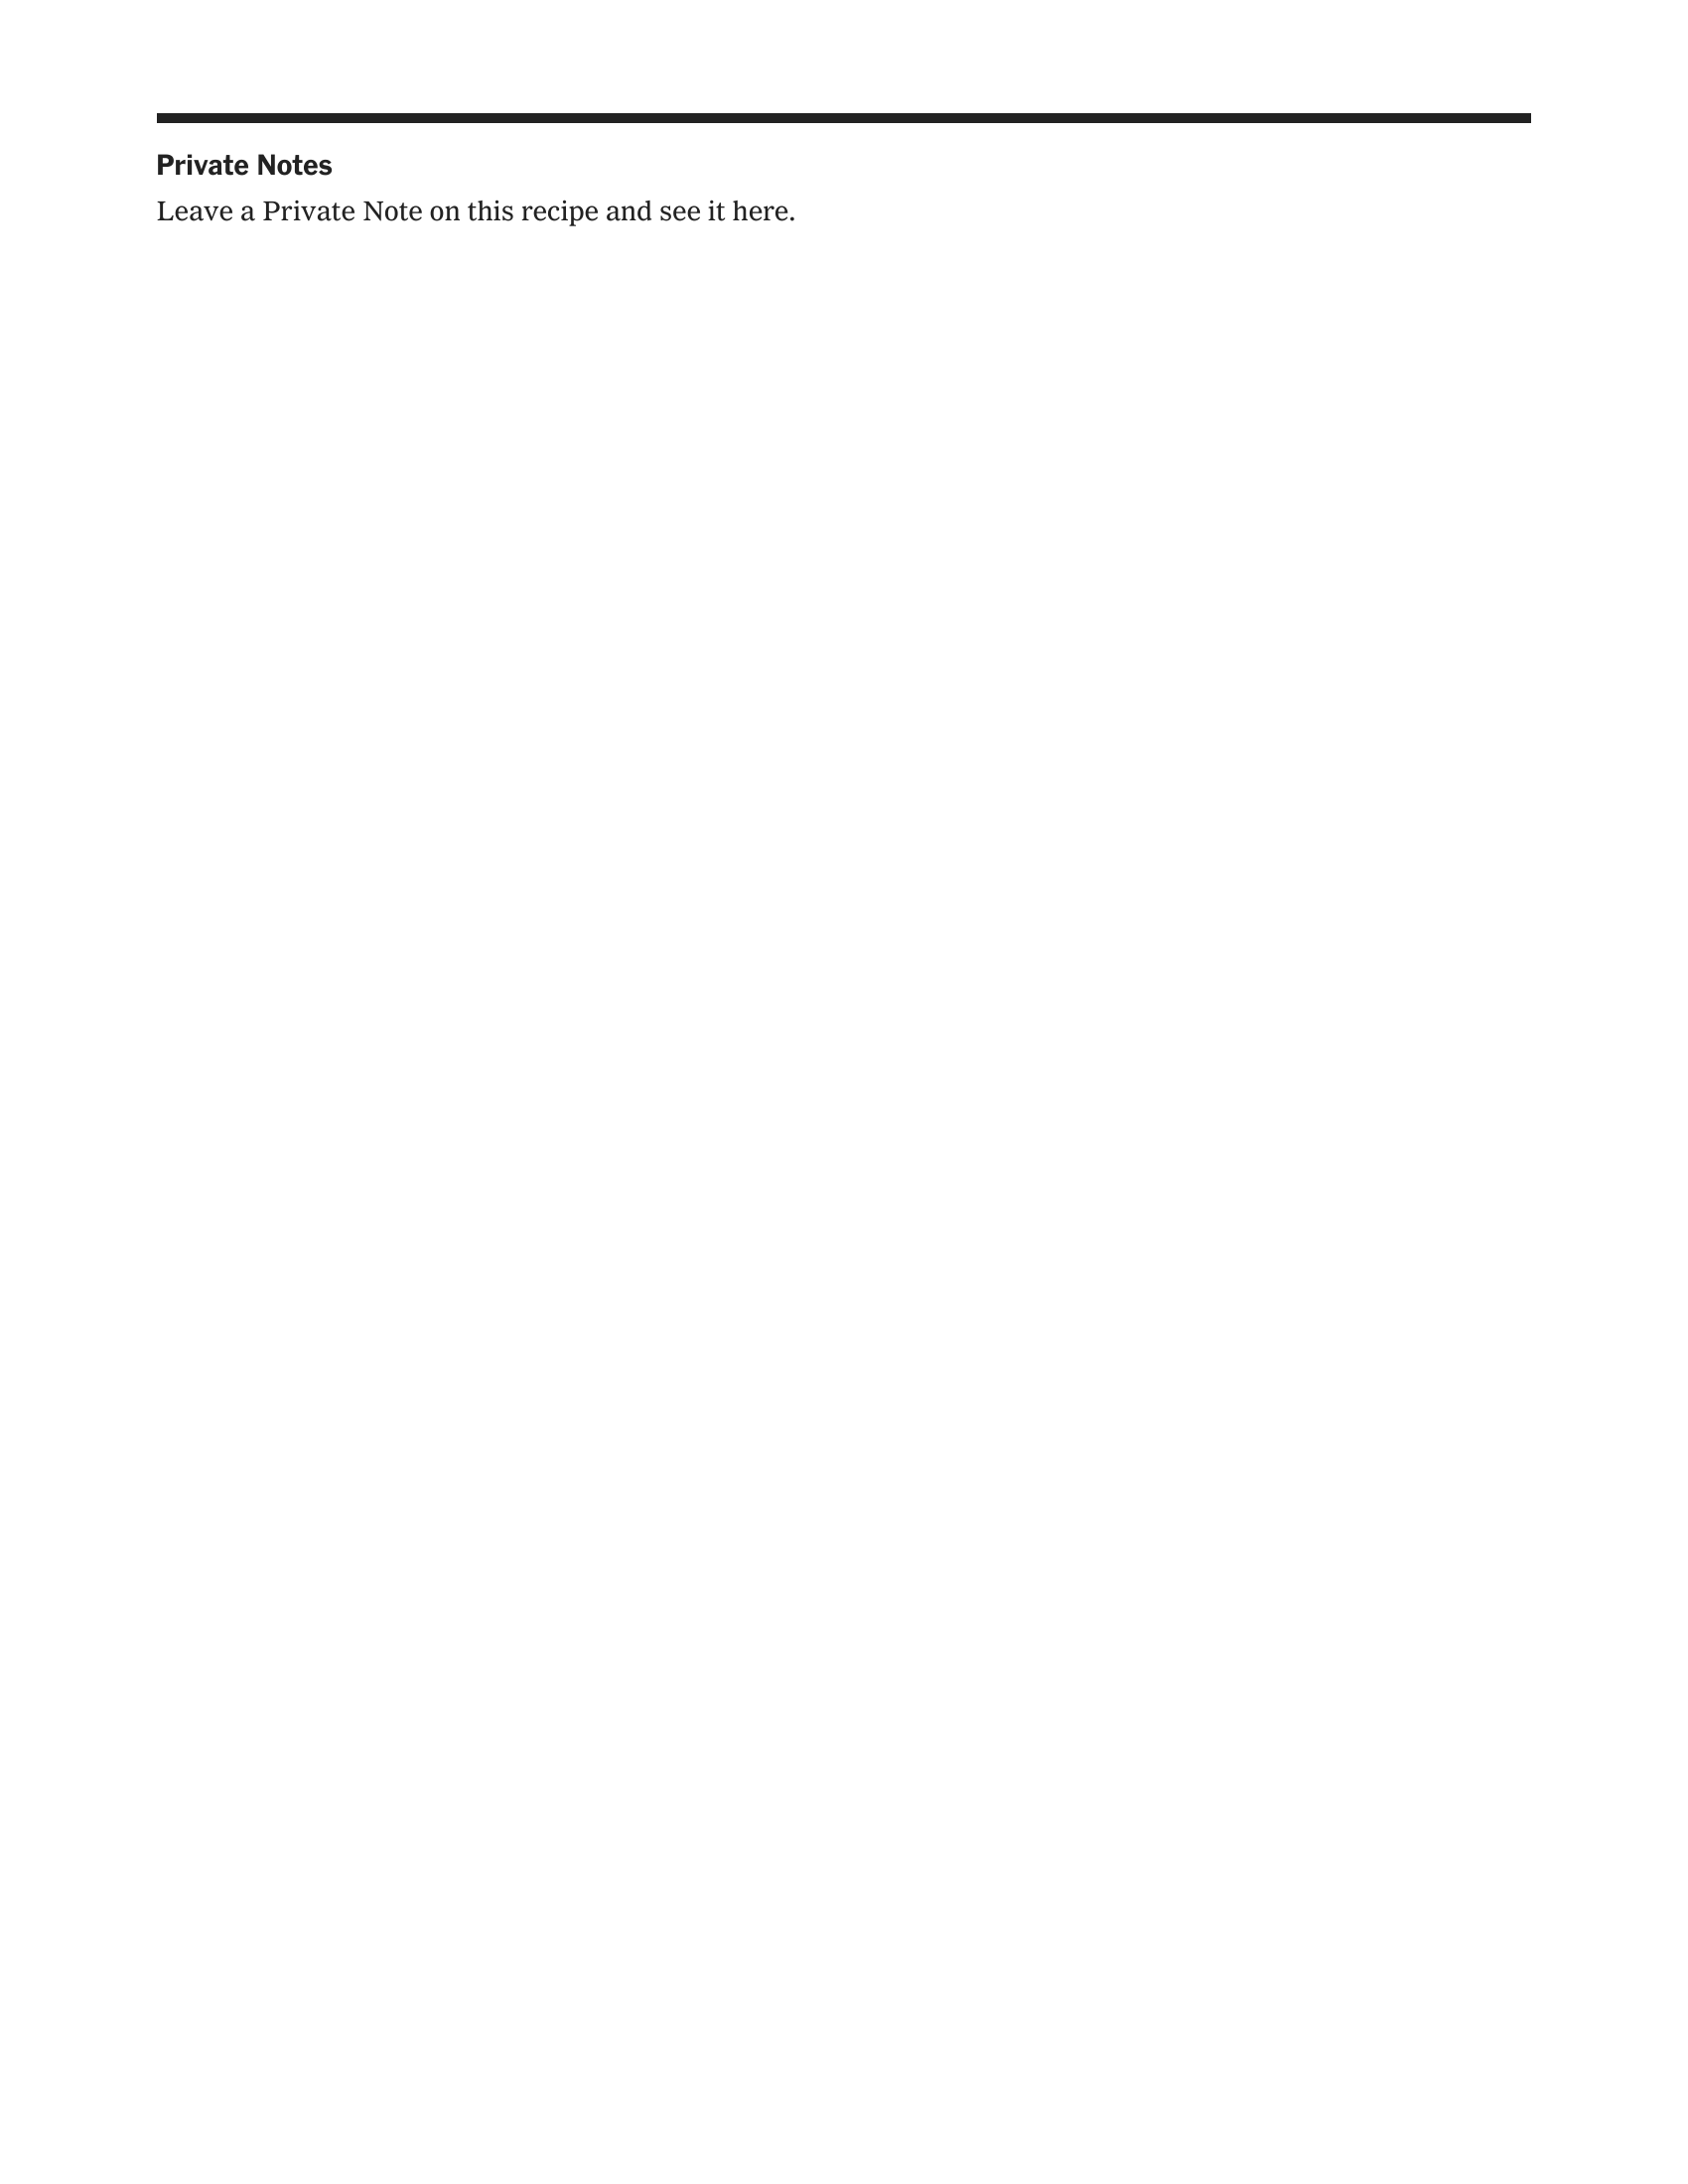

In [156]:
chat_history = context_enabled("Do you have one without onion?", chat_history)

In [29]:
!pip3 install PyMuPDF pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 8.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [41]:
import fitz
from PIL import Image
import io

def extract_image_from_pdf(pdf_path, output_image_path, box):
    """
    Extracts an image from a given box in the PDF.

    Parameters:
        pdf_path (str): Path to the input PDF file.
        output_image_path (str): Path to save the extracted image.
        box (tuple): A 4-tuple (left, upper, right, lower) defining the box to crop from the extracted image.

    Returns:
        None
    """

    # Open the PDF
    pdf_document = fitz.open(pdf_path)

    # Get the first page
    page = pdf_document[0]

    # Get image list - this gets a list of XREF of images
    img_list = page.get_images(full=True)

    # For this example, we take the first image
    xref = img_list[0][0]
    base_image = pdf_document.extract_image(xref)
    image_bytes = base_image["image"]

    # Convert to PIL Image
    pil_image = Image.open(io.BytesIO(image_bytes))

    # Crop the image
    cropped_image = pil_image.crop(box)

    #use this cropped image to display for the frontend

# Define the box (coordinates) to extract the portion of the image
box = (0, 0, 760, 510)  # (left, upper, right, lower)

extract_image_from_pdf("../app/backend/data/Bò Né (Steak and Eggs) Recipe - NYT Cooking.pdf", "output_image.jpg", box)
